# Exercício Aula 4 - Rafael Couto
Usar pipeline, usar grid/search random, usar um dataset para fazer regressão

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV


from xgboost import XGBRegressor

In [2]:
#Carregando dataset
df=pd.read_parquet('spotify_songs.parquet')

In [3]:
df.head()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32833 entries, 6f807x0ima9a1j3VPbc7VN to 29zWqhca3zt5NsckZqDf6c
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                32828 non-null  object 
 1   track_artist              32828 non-null  object 
 2   track_popularity          32833 non-null  int64  
 3   track_album_id            32833 non-null  object 
 4   track_album_name          32828 non-null  object 
 5   track_album_release_date  32833 non-null  object 
 6   playlist_name             32833 non-null  object 
 7   playlist_id               32833 non-null  object 
 8   playlist_genre            32833 non-null  object 
 9   playlist_subgenre         32833 non-null  object 
 10  danceability              32833 non-null  float64
 11  energy                    32833 non-null  float64
 12  key                       32833 non-null  int64  
 13  loudness                  32

## Limpeza do dataset

Foram removidas as colunas `track_album_id` ,`track_album_name`,`track_album_release_date`,`playlist_name` e `playlist_id`.

In [5]:
#removendo colunas 
df = df.drop(columns=['track_album_id','track_album_name','track_album_release_date','playlist_name','playlist_id'])

Vamos avaliar os possível valores nulos do dataset.

In [6]:
df.isnull().sum()

track_name           5
track_artist         5
track_popularity     0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

In [7]:
df[df['track_name'].isnull()][['track_name','track_artist','track_popularity']]

,track_name,track_artist,track_popularity
track_id,,,
69gRFGOWY9OMpFJgFol1u0,None,None,0
5cjecvX0CmC9gK0Laf5EMQ,None,None,0
5TTzhRSWQS4Yu8xTgAuq6D,None,None,0
3VKFip3OdAvv4OfNTgFWeQ,None,None,0
69gRFGOWY9OMpFJgFol1u0,None,None,0


Verificamos que apenas 5 entradas não tem nome da música ou do artista. Essas 5 faixar também estão com a popularidade zerada. 
Vamos remover essas 5 entradas do dataset

In [8]:
df = df.dropna(subset=['track_name'])

In [9]:
df.isnull().sum()

track_name           0
track_artist         0
track_popularity     0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

# Estabelecendo X,y

In [10]:
X = df.drop(columns=['track_name','track_artist','track_popularity','playlist_genre','playlist_subgenre','key','mode'])
y = df['track_popularity']

# Treinando Regressor por arvore de decisão

Melhores parâmetros: {'xgbregressor__learning_rate': 0.1, 'xgbregressor__n_estimators': 400}

Erro Quadrático Médio (MSE): 502.74

Coeficiente de Determinação (R²): 0.19



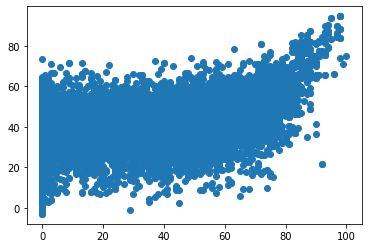

In [11]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)


 # Criando o pipeline com MinMaxScaler e XGBRegressor
pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Normaliza os dados
        ('xgbregressor', XGBRegressor(random_state=42))
    ])

# Definindo os parâmetros para Grid Search
param_grid = {
    'xgbregressor__n_estimators': [200,300,400],
    'xgbregressor__learning_rate': [0.1,0.01]
}
    
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Treinando o modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Obtendo os melhores parâmetros encontrados
best_params = grid_search.best_params_
print(f"Melhores parâmetros: {best_params}\n")

# Fazendo previsões no conjunto de teste usando o melhor modelo do Grid Search
y_pred = grid_search.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprima as métricas de avaliação
print(f'Erro Quadrático Médio (MSE): {mse:.2f}\n')
print(f'Coeficiente de Determinação (R²): {r2:.2f}\n')

plt.scatter(y_test, y_pred)